In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda, Layer
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras import metrics
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv('bonds_data.csv')

# Split data into train and test
train, test = train_test_split(df, test_size=0.2)

# Scale data
scaler = StandardScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

# Define the encoder
input_dim = train.shape[1]
encoding_dim = 2

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

# Define the decoder
decoder = Dense(int(encoding_dim / 2), activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

# Define the autoencoder
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

# Train the autoencoder
history = autoencoder.fit(train, train,
                    epochs=100,
                    batch_size=32,
                    shuffle=True,
                    validation_data=(test, test),
                    verbose=1)

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Define the encoder model
encoder = Model(inputs=input_layer, outputs=encoder)

# Encode the test data
encoded_data = encoder.predict(test)

# Plot the encoded data
plt.scatter(encoded_data[:,0], encoded_data[:,1])
plt.show()


ValueError: could not convert string to float: '2022-06-01 14:16:32.989+00'

In [2]:
pip install sklearn

     |████████████████████████████████| 30.8 MB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 74.5 MB/s eta 0:00:01
     |████████████████████████████████| 42.2 MB 58.1 MB/s eta 0:00:01��████████████████████▎          | 28.0 MB 58.1 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1304 sha256=4f81c3e32f558b45c9fb10d793ff1d698dd58ec6d1648582d3cca67e39661057
  Stored in directory: /home/studio-lab-user/.cache/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

     |████████████████████████████████| 11.7 MB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 503 kB 103.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


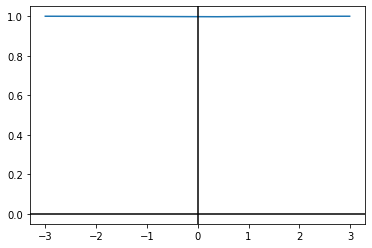

In [5]:
# Create a Z-score probability distribution for outliers
z = np.arange(-3, 3, 0.01)
z_prob = 1 - (1 - 0.997300203937) * np.exp(-0.5 * z ** 2)

# Visualize it.
plt.plot(z, z_prob)

# Give a line at zero
plt.axhline(0, color='k')
plt.axvline(0, color='k')

plt.show()

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

plot_model(model, to_file='model.png')

2022-07-28 14:04:51.798788: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-28 14:04:51.798818: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


2022-07-28 14:04:53.705771: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-28 14:04:53.705807: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-28 14:04:53.705833: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (default): /proc/driver/nvidia/version does not exist
2022-07-28 14:04:53.706154: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


11490434/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)
Epoch 1/50
235/235 [==============================] - 3s 9ms/step - loss: 0.6944 - val_loss: 0.6943
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6942 - val_loss: 0.6941
Epoch 3/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6940 - val_loss: 0.6939
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6939 - val_loss: 0.6938
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6937 - val_loss: 0.6936
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6935 - val_loss: 0.6934
Epoch 7/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6933 - val_loss: 0.6932
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6931 - val_loss: 0.6930
Epoch 9/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6930 - val_loss: 0.6928
Epoch 10/

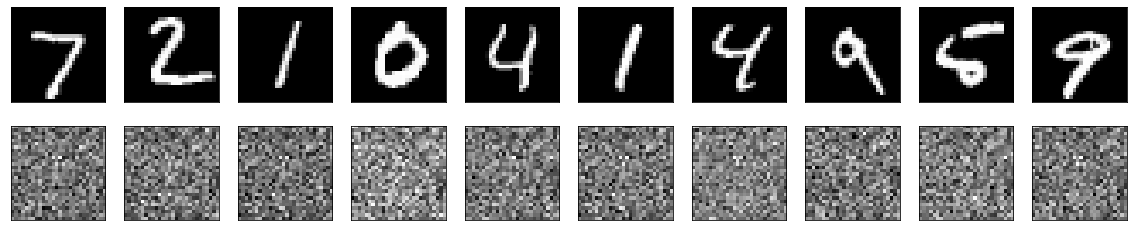

In [2]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [1]:
pip install plotnine

     |████████████████████████████████| 1.2 MB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 5.4 MB/s  eta 0:00:01
     |████████████████████████████████| 233 kB 17.3 MB/s eta 0:00:01
     |████████████████████████████████| 9.9 MB 18.3 MB/s eta 0:00:01
     |████████████████████████████████| 111 kB 81.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
